In [1]:
import pandas as pd
from pycaret.classification import *

In [2]:
fake_news = pd.read_csv('WELFake_fake.csv')
real_news = pd.read_csv('WELFake_real.csv')

In [3]:
print(fake_news.shape, real_news.shape)

(37067, 777) (35028, 777)


In [4]:
real_news['label'] = 0
fake_news['label'] = 1

In [5]:
news = pd.concat([real_news, fake_news], ignore_index=True)

In [6]:
lgbm = load_model('lightgbm_model')

Transformation Pipeline and Model Successfully Loaded


In [7]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
normalizer = Normalizer()

In [9]:
X_test = news.drop('label', axis=1)
y_test = news['label']

In [10]:
X_test_scaled = normalizer.fit_transform(X_test)
y_pred = lgbm.predict(X_test_scaled)

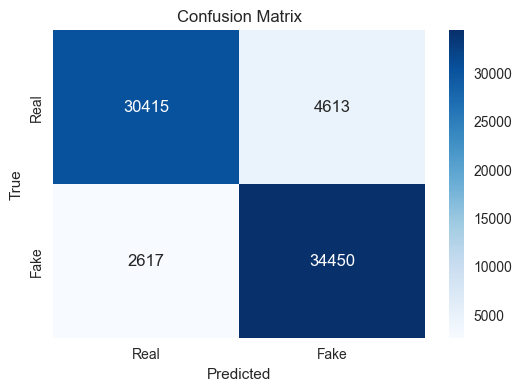

In [11]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Real', 'Fake']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     35028
           1       0.88      0.93      0.91     37067

    accuracy                           0.90     72095
   macro avg       0.90      0.90      0.90     72095
weighted avg       0.90      0.90      0.90     72095



In [18]:
report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'], output_dict=True)
df = pd.DataFrame(report).transpose().round(2)
df

,precision,recall,f1-score,support
Real,0.92,0.87,0.89,35028.0
Fake,0.88,0.93,0.91,37067.0
accuracy,0.90,0.90,0.90,0.9
macro avg,0.90,0.90,0.90,72095.0
weighted avg,0.90,0.90,0.90,72095.0


In [55]:
lgbm_model = lgbm.named_steps['trained_model']

In [56]:
import lightgbm as lgb

In [57]:
num_trees = lgbm_model.booster_.num_trees()
print("Number of trees:", num_trees)

Number of trees: 100


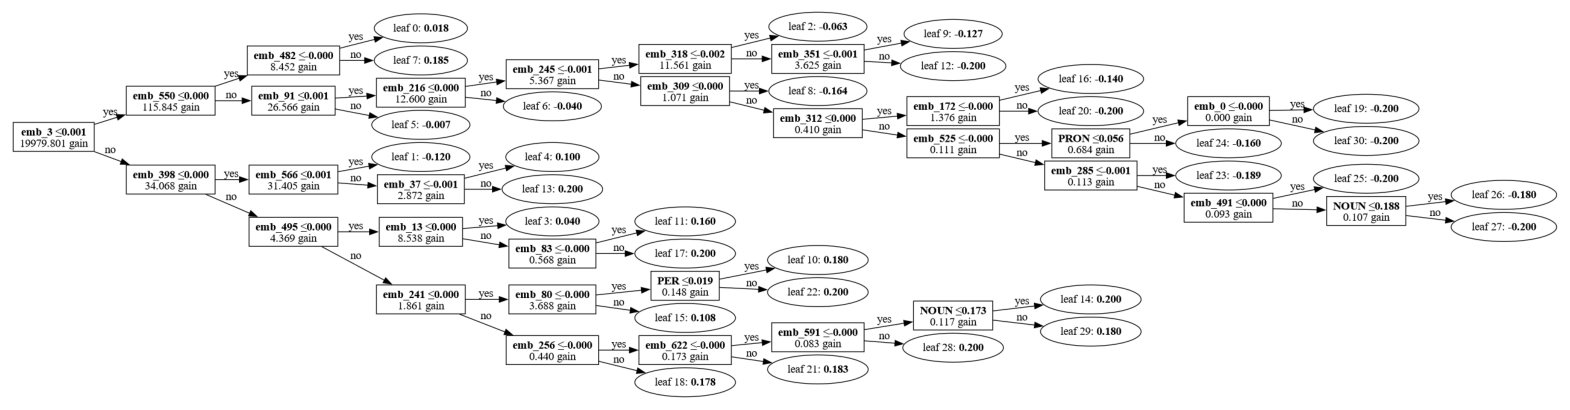

In [58]:
ax = lgb.plot_tree(lgbm_model, tree_index=0, figsize=(20, 8), show_info=['split_gain'])
plt.show()